<center>
    <span style="font-size: 1.0em; color:black"><b>
        DOCUMENTATION
    </b></span>
    <br>
    <span style="font-size: 2.5em; color:black"><b>
        AirfoilDatabase
    </b></span>
    <br>
    <span style="font-size: 0.75em;"><i>
        Last update: July 2$^\mathrm{nd}$, 2020
    </i></span> 
</center>

In [1]:
using Revise
import CSV

import AirfoilPrep
ap = AirfoilPrep

import AirfoilDatabase
adb = AirfoilDatabase

# Database that will be used
database_path = "data/mock_database/"

# Macro for evaluating bash commands
macro bash_str(s) open(`bash`,"w",stdout) do io; print(io, s); end; end

# Number of table columns to show in notebook
ENV["COLUMNS"] = 2000;

┌ Warning: no Manifest.toml file found, static paths used
└ @ Revise /home/edoalvar/.julia/packages/Revise/tV8FE/src/Revise.jl:1309
┌ Info: Precompiling AirfoilDatabase [874188ba-a430-49f5-a1da-c5ba3c632279]
└ @ Base loading.jl:1260


HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-15170319066868065614\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-15954611351606215074\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-15170319066868065614\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-4073107635167528046\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-9565992386345413968\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-4073107635167528046\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

# Creating a New Database

The repository comes with a default database that you can use, but if you want to create a new database, you simply need to call the function `new_database(path)` and it will create the folder structure of a new database in the given path.

In [2]:
? adb.new_database

```
`new_database(path::String; index_file::String=DEF_NDXFL, mkpath_optargs=[], prompt=true, v_lvl=0)`
```

Creates a new airfoil database in the given path.


For example, let's create a new database:

In [3]:
database_path = "data/mock_database/"    # Path to the new database

adb.new_database(database_path)          # Create database

"data/mock_database/index.csv"

That created the following folder structure:

In [4]:
run(`tree $(database_path)`);

data/mock_database/
├── Cd
├── Cl
├── Cm
├── index.csv
├── xlosep
├── xupsep
└── xy

6 directories, 1 file


`Cd`, `Cl`, and `Cm` are the folders where the csv files containing each coefficient vs angle of attack will be stored. Similarly, `xlosep` and `xupsep` are the folder for the csv files with the separation poing over the lower and upper surface of the airfoil vs angle of attack. `xy` is the folder containing airfoil contours.

Notice the `index.csv` file. This file contains the indexing of the database. All csv files stored in the forementioned directories will be referenced by at least one of the entries in the indexing file. Initially, the file only contains the csv headers:

In [5]:
CSV.read(joinpath(database_path, "index.csv"))

,Airfoil,Re,Mach,Panels,Ncrit,Degrees,xy file,Cl file,Cd file,Cm file,xupsep file,xlosep file,Differentiator
,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing


# Data Structure

The data structure of `AirfoilDatabase` is singularly defined through the internal variable `AirfoilDatabase.LBLS`, which contains the possible labels of every entry of the database.

In [6]:
adb.LBLS

OrderedCollections.OrderedDict{Symbol,Any} with 13 entries:
  :airfoilname => ("Airfoil", "required", String, "Airfoil name")
  :re          => ("Re", 0, Real, "Reynolds number")
  :ma          => ("Mach", 0, Real, "Mach number")
  :npanels     => ("Panels", 0, Int64, "Number of panels (XFOIL)")
  :ncrit       => ("Ncrit", 0, Real, "XFOIL Ncrit parameter")
  :deg         => ("Degrees", true, Bool, "XFOIL Ncrit parameter")
  :xyfile      => ("xy file", "required", String, "Airfoil contour file")
  :clfile      => ("Cl file", " ", String, "Cl file")
  :cdfile      => ("Cd file", " ", String, "Cd file")
  :cmfile      => ("Cm file", " ", String, "Cm file")
  :xupsepfile  => ("xupsep file", " ", String, "xupsep file")
  :xlosepfile  => ("xlosep file", " ", String, "xlosep file")
  :diff        => ("Differentiator", 0, Int64, "Differentiator number (for accepting duplicates)")

Here I coded an internal function that creates a nice table of `LBLS`. 

In [7]:
adb._lbls2dataframe()

,Field,Header,Default value,Value type,Description
,Symbol,String,Any,DataType,String
1,airfoilname,Airfoil,required,String,Airfoil name
2,re,Re,0,Real,Reynolds number
3,ma,Mach,0,Real,Mach number
4,npanels,Panels,0,Int64,Number of panels (XFOIL)
5,ncrit,Ncrit,0,Real,XFOIL Ncrit parameter
6,deg,Degrees,1,Bool,XFOIL Ncrit parameter
7,xyfile,xy file,required,String,Airfoil contour file
8,clfile,Cl file,,String,Cl file
9,cdfile,Cd file,,String,Cd file


* The column `Field` shows the internal Symbol representation of each label. 
* The column `Header` is the string that is written in the indexing file (`index.csv`) as the header of each label (or csv column). 
* The column `Default value` indicates whether the label is required for every entry, and if not, it indicates the default value if the label was not given.
* The column `Value type` indicates the type of each label.

Regarding each label:
* ***Airfoil*** is the name of the airfoil.
* ***Re*** is the Reynolds number of this entry.
* ***Mach*** is the Mach number of this entry.
* ***Panel*** is the number of panels used to generate this polar (or use it to however you esteem better to describe spatial resolution).
* ***Ncrit*** is a measure of the level of turbulence used in this entry (either the `ncrit` parameter of XFOIL, or use it to however you esteem better to describe turbulence).
* ***Degrees*** is whether this entry is in degrees or radians (true or false).
* ***xy, Cl, Cd, Cm, xupsep, xlosep*** are the name files containing each parameter vs angle of attack (there is no need to have these files matching the same angles of attack).
* ***Differentiator*** is an arbitrary differentiator or ID number that allows the user to input duplicate entries or flag entries in any arbitrary way.

# Adding an Entry Manually

Entries can be added to the database through the `new_entry` function by specifying each label manually. 

In [9]:
? adb.new_entry(;)

```
`new_entry(; database_path::String=/home/edoalvar/Dropbox/FLOWResearch/FLOWCodes/AirfoilDatabase/src/../database/, index_file::String=index.csv, lbls...)`
```

Adds a new entry to the database under `database_path` with indexing file `index_file`. `lbls` are the labels of the entry (or columns of database), as shown above (Fields is the name of the label):

OrderedCollections.OrderedDict{Symbol,Any} with 13 entries:   :airfoilname => ("Airfoil", "required", String, "Airfoil name")   :re => ("Re", 0, Real, "Reynolds number")   :ma => ("Mach", 0, Real, "Mach number")   :npanels => ("Panels", 0, Int64, "Number of panels (XFOIL)")   :ncrit => ("Ncrit", 0, Real, "XFOIL Ncrit parameter")   :deg => ("Degrees", true, Bool, "XFOIL Ncrit parameter")   :xyfile => ("xy file", "required", String, "Airfoil contour file")   :clfile => ("Cl file", " ", String, "Cl file")   :cdfile => ("Cd file", " ", String, "Cd file")   :cmfile => ("Cm file", " ", String, "Cm file")   :xupsepfile => ("xupsep file", " ", String, "xupsep file")   :xlosepfile => ("xlosep file", " ", String, "xlosep file")   :diff => ("Differentiator", 0, Int64, "Differentiator number (for accepting duplicates)")

For instance, here is a dummy example on how to add an airfoil with only the required fields: `db.new_entry(; airfoilname="NACA 0012", xyfile="naca0012.csv)`


This method is discouraged since it requires explicit knowledge of the data structure in the database. Rather, the user is encouraged to add entries as Polar objects as shown in the next section.

To add an entry manually, each label needs to be given to the `new_entry` function as an optional argument, with the field as the name of the argument. Not all the labels need to be specified, but at least the ones required are expected, which are:

In [10]:
adb.RQRD_FIELDS

2-element Array{Symbol,1}:
 :airfoilname
 :xyfile

In this example we are adding a dummy entry:

In [11]:
adb.new_entry(; database_path=database_path, 
                    airfoilname="My Dummy Airfoil", 
                    xyfile="some-ficticious-file.csv",
                    re=1e6,
                    ma=0.3,
                    clfile="some-other-ficticious-file.csv"
                    )

Now we can find our new entry in the `index.csv` file:

In [12]:
CSV.read(joinpath(database_path, "index.csv"))

,Airfoil,Re,Mach,Panels,Ncrit,Degrees,xy file,Cl file,Cd file,Cm file,xupsep file,xlosep file,Differentiator
,String,Float64,Float64,Int64,Int64,Bool,String,String,String,String,String,String,Int64
1,My Dummy Airfoil,1.0e6,0.3,0,0,1,some-ficticious-file.csv,some-other-ficticious-file.csv,,,,,0


NOTE: The database does not check whether the csv files of the new entry exist or not, and is rather left to the user to ensure that those files exist. For instance, notice that there is no `some-ficticious-file.csv` under the `xy` folder in our database yet.

In [13]:
run(`tree $(database_path)`);

data/mock_database/
├── Cd
├── Cl
├── Cm
├── index.csv
├── xlosep
├── xupsep
└── xy

6 directories, 1 file


# Adding an Entry with [`AirfoilPrep.jl`](https://github.com/byuflowlab/AirfoilPrep.jl)

[`AirfoilPrep.jl`](https://github.com/byuflowlab/AirfoilPrep.jl) defines a Polar type that can hold airfoil information and given to the `new_entry` function.

In [14]:
? adb.new_entry(::ap.Polar)

```
`new_entry(polar::AirfoilPrep.Polar; database_path::String=/home/edoalvar/Dropbox/FLOWResearch/FLOWCodes/AirfoilDatabase/src/../database/, index_file::String=index.csv, lbls...)`
```

Adds a new entry to the database under `database_path` with indexing file `index_file`. `lbls` are the labels of the entry (or columns of database), as shown above (Fields is the name of the label).


A Polar object can be constructed manually through `AirfoilPrep.Polar`, giving the airfoil data manually.

One way of generating airfoil data and a Polar object automatically is through the XFOIL Julia wrapper found in the package [`AirfoilPrep.jl`](https://github.com/byuflowlab/AirfoilPrep.jl). In this example we sweep XFOIL on a NACA 0012 airfoil in between $-30^\circ$ and $30^\circ$ angle of attack (AOA).

In [16]:
airfoil_file = "data/naca0012.csv"  # Airfoil contour to read
Re = 10e6                           # Reynolds number
Ma = 0.22                           # Mach number
alphas = [i for i in -30:1.0:30]    # Range of AOA to sweep

# Read airfoil contour
x, y = ap.readcontour(airfoil_file; header_len=1, delim=",")

# Run XFOIL generating the polar
polar = ap.runXFOIL(x, y, Re; alphas=alphas,
                              verbose=true, Mach=Ma,
                              iter=100);


Angle		Cl		Cd		Cm		Converged
0.000000	0.000000	0.005094	-0.000000	1
-1.000000	-0.117093	0.005152	0.000225	1
-2.000000	-0.233974	0.005327	0.000384	1
-3.000000	-0.350796	0.005572	0.000459	1
-4.000000	-0.467158	0.005888	0.000363	1
-5.000000	-0.583538	0.006209	0.000135	1
-6.000000	-0.699624	0.006581	-0.000307	1
-7.000000	-0.814767	0.007049	-0.001113	1
-8.000000	-0.928379	0.007620	-0.002441	1
-9.000000	-1.038933	0.008354	-0.004575	1
-10.000000	-1.157205	0.009265	-0.005068	1
-11.000000	-1.282727	0.010365	-0.004083	1
-12.000000	-1.384689	0.011627	-0.008104	1
-13.000000	-1.488813	0.012966	-0.011721	1
-14.000000	-1.585088	0.014828	-0.016462	1
-15.000000	-1.675549	0.016765	-0.022048	1
-16.000000	-1.737215	0.019327	-0.031420	1
-17.000000	-1.776619	0.023691	-0.040076	1
-18.000000	-1.789662	0.031797	-0.044495	1
-19.000000	-1.776955	0.045083	-0.042072	1
-20.000000	-1.696944	0.068639	-0.031132	1
-21.000000	-1.508365	0.109239	-0.008317	1
-22.000000	-1.272777	0.163411	0.027170	1
-23.000000	-1.135304	0

`AirfoilPrep.runXFOIL` returns a polar, which we can visualize through the `AirfoilPrep.plot` function:

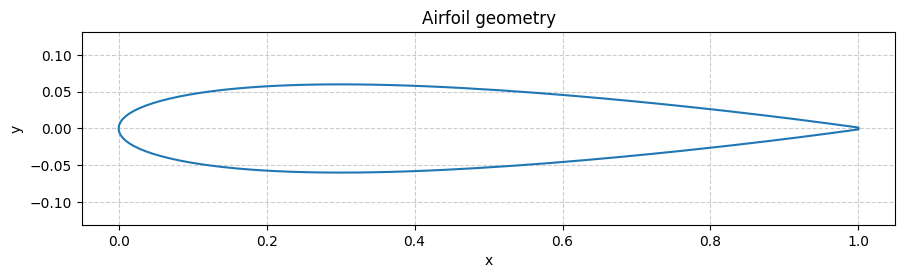

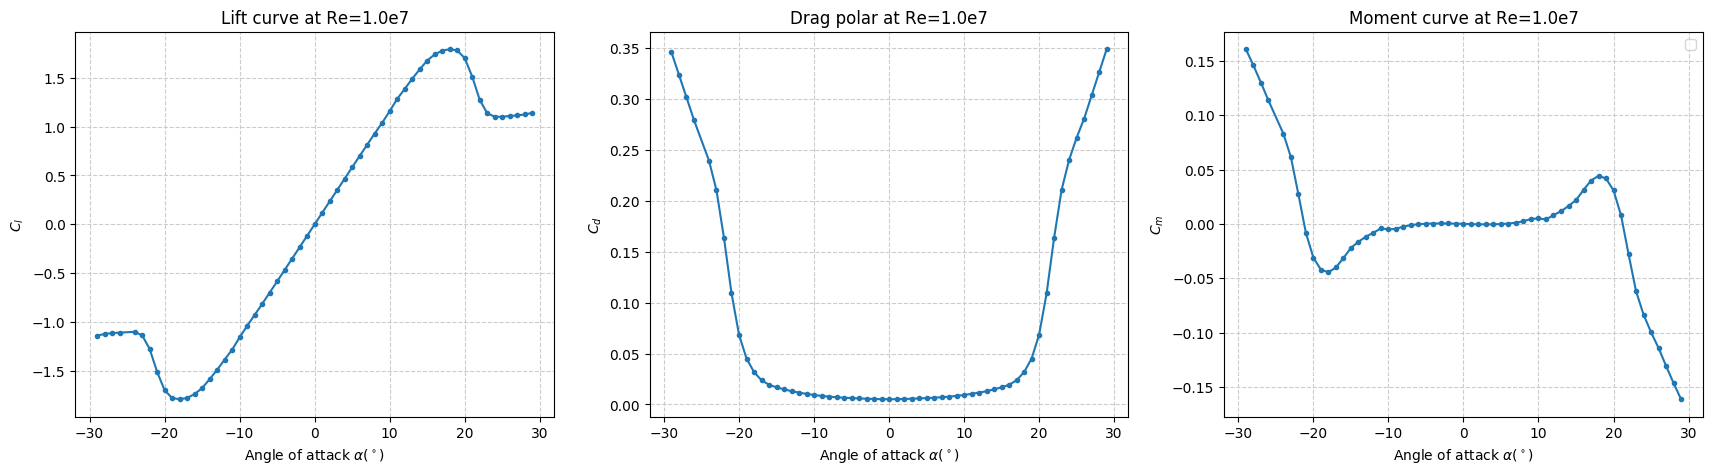

In [17]:
# Plot polar
ap.plot(polar; geometry=true, cdpolar=false);

Then we add the polar to our database as follows:

In [19]:
adb.new_entry(polar; database_path=database_path, airfoilname="NACA 0012")

Here we see that this NACA 0012 was now added to the indexing file:

In [22]:
CSV.read(joinpath(database_path, "index.csv"))

,Airfoil,Re,Mach,Panels,Ncrit,Degrees,xy file,Cl file,Cd file,Cm file,xupsep file,xlosep file,Differentiator
,String,Float64,Float64,Int64,Float64,Bool,String,String,String,String,String,String,Int64
1,My Dummy Airfoil,1.0e6,0.3,0,0.0,1,some-ficticious-file.csv,some-other-ficticious-file.csv,,,,,0
2,NACA 0012,1.0e7,0.22,160,9.0,1,NACA0012-npanels160-0.csv,NACA0012-Cl-re10000000-ma0p22-ncrit9p0-0.csv,NACA0012-Cd-re10000000-ma0p22-ncrit9p0-0.csv,NACA0012-Cm-re10000000-ma0p22-ncrit9p0-0.csv,NACA0012-xupsep-re10000000-ma0p22-ncrit9p0-0.csv,NACA0012-xlosep-re10000000-ma0p22-ncrit9p0-0.csv,0


And csv files with the all the airfoil properties referenced by the entry have been automatically created in our database:

In [23]:
run(`tree $(database_path)`);

data/mock_database/
├── Cd
│   └── NACA0012-Cd-re10000000-ma0p22-ncrit9p0-0.csv
├── Cl
│   └── NACA0012-Cl-re10000000-ma0p22-ncrit9p0-0.csv
├── Cm
│   └── NACA0012-Cm-re10000000-ma0p22-ncrit9p0-0.csv
├── index.csv
├── xlosep
│   └── NACA0012-xlosep-re10000000-ma0p22-ncrit9p0-0.csv
├── xupsep
│   └── NACA0012-xupsep-re10000000-ma0p22-ncrit9p0-0.csv
└── xy
    └── NACA0012-npanels160-0.csv

6 directories, 7 files


For instance, here is the csv file that is being referenced as containing the $C_\ell$ data:

In [24]:
CSV.read(joinpath(database_path, "Cl", "NACA0012-Cl-re10000000-ma0p22-ncrit9p0-0.csv"))

,alpha,cl
,Float64,Float64
1,-29.0,-1.1382
2,-28.0,-1.12221
3,-27.0,-1.11241
4,-26.0,-1.10823
5,-24.0,-1.10011
6,-23.0,-1.1353
7,-22.0,-1.27278
8,-21.0,-1.50837
9,-20.0,-1.69694


# Running and Adding Sweeps

Using the previous example where we run XFOIL through [`AirfoilPrep.jl`](https://github.com/byuflowlab/AirfoilPrep.jl), we can run large sweeps of airfoil polars at a variety of Reynolds and Mach numbers, or any other parameters. In the following lines we run a sweep of the airfoil polars of a NACA 0012 at six different Reynolds numbers, three Mach number, and three levels of turbulence, and they are immediately added to the database:

In [30]:
# -------------- SWEEP PARAMETERS -----------------------------------------------
airfoil_file = "data/naca0012.csv"  # Airfoil contour

alphas = [i for i in -30:1.0:30]    # (deg) angle of attacks to sweep
Res = [8e4, 1.5e6, 3e6, 5e6, 8e6, 1e7, 1.5e7] # Chord-based Reynolds numbers to sweep
Mas = [0, 0.15, 0.28]               # Mach numbers to sweep
ncrits = [14, 9, 4]                 # Ncrit to sweep

# Read airfoil conotur
x, y = ap.readcontour(airfoil_file; header_len=1, delim=",")

# -------------- RUN SWEEP ------------------------------------------------------
for ncrit in ncrits
    for Ma in Mas
        for Re in Res
            println("Sweep at Re=$Re\tMa=$Ma\tncrit=$ncrit...")
            
            # Run XFOIL (create polar)
            polar = ap.runXFOIL(x, y, Re; alphas=alphas,
                                          Mach=Ma,
                                          ncrit=ncrit,
                                          verbose=false, 
                                          iter=100)
            # Add polar to the database
            adb.new_entry(polar; database_path=database_path, airfoilname="NACA 0012", warn=false)
            
        end
    end
end

Sweep at Re=80000.0	Ma=0.0	ncrit=14...
Sweep at Re=3.0e6	Ma=0.0	ncrit=14...
Sweep at Re=5.0e6	Ma=0.0	ncrit=14...
Sweep at Re=8.0e6	Ma=0.0	ncrit=14...
Sweep at Re=1.0e7	Ma=0.0	ncrit=14...
Sweep at Re=1.5e7	Ma=0.0	ncrit=14...
Sweep at Re=80000.0	Ma=0.15	ncrit=14...
Sweep at Re=3.0e6	Ma=0.15	ncrit=14...
Sweep at Re=5.0e6	Ma=0.15	ncrit=14...
Sweep at Re=8.0e6	Ma=0.15	ncrit=14...
Sweep at Re=1.0e7	Ma=0.15	ncrit=14...
Sweep at Re=1.5e7	Ma=0.15	ncrit=14...
Sweep at Re=80000.0	Ma=0.28	ncrit=14...
Sweep at Re=3.0e6	Ma=0.28	ncrit=14...
Sweep at Re=5.0e6	Ma=0.28	ncrit=14...
Sweep at Re=8.0e6	Ma=0.28	ncrit=14...
Sweep at Re=1.0e7	Ma=0.28	ncrit=14...
Sweep at Re=1.5e7	Ma=0.28	ncrit=14...
Sweep at Re=80000.0	Ma=0.0	ncrit=9...
Sweep at Re=3.0e6	Ma=0.0	ncrit=9...
Sweep at Re=5.0e6	Ma=0.0	ncrit=9...
Sweep at Re=8.0e6	Ma=0.0	ncrit=9...
Sweep at Re=1.0e7	Ma=0.0	ncrit=9...
Sweep at Re=1.5e7	Ma=0.0	ncrit=9...
Sweep at Re=80000.0	Ma=0.15	ncrit=9...
Sweep at Re=3.0e6	Ma=0.15	ncrit=9...
Sweep at Re=5.0e6	Ma=0

# Visualization

In [8]:
adb.visualize(; database_path=database_path, plot_backend=adb.plt.plotly)

0

WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Scope(WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["Airfoil"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :span), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text : key")))], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "click: function (){\$root.update(val)}, css: {'is-primary is-selected' : \$root.index() == val, 'interact-widget is-medium button ' : true}")))], Dict{Symbol,Any}(:attributes => ("data-bind" => "foreach : options_js"),:className => "buttons has-addons is-centered"))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[], Dict{Symbol,Any}())], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("options_js" => (Observable{Any} with 1 listeners. Value:
OrderedCollections.OrderedDict[OrderedCollections.OrderedDict{String,Any}("key" => "NACA 0012","val" => 1,"id" => "ideO7w63VI"), OrderedCollections.OrderedDict{String,Any}("key" => "My Dummy Airfoil","val" => 2,"id" => "idcLmPIYiu")], nothing),"index" => (Observable{Any} with 2 listeners. Value:
1, nothing)), Set(String[]), nothing, WebIO.Asset[WebIO.Asset("js", "knockout", "/home/edoalvar/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), WebIO.Asset("js", "knockout_punches", "/home/edoalvar/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), WebIO.Asset("js", nothing, "/home/edoalvar/.julia/packages/InteractBase/sOe2Z/src/../assets/all.js"), WebIO.Asset("css", nothing, "/home/edoalvar/.julia/packages/InteractBase/sOe2Z/src/../assets/style.css"), WebIO.Asset("css", nothing, "/home/edoalvar/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("options_js" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"options_js\"]()) ? (this.valueFromJulia[\"options_js\"]=true, this.model[\"options_js\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(WebIO.AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007fa087c61fc0, Task (runnable) @0x00007fa087c61fc0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n  

In [1]:
using Interact

@manipulate for npp=1:180
    npp
end

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-10751906503398083109\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-12236643952745497109\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-10751906503398083109\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["npp"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 180,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
90, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/home/edoalvar/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/edoalvar/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/edoalvar/.julia/packages/InteractBase/sOe2Z/src/../assets/all.js"), Asset("css", nothing, "/home/edoalvar/.julia/packages/InteractBase/sOe2Z/src/../assets/style.css"), Asset("css", nothing, "/home/edoalvar/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007f8a3fbdceb0, Task (runnable) @0x00007f8a3fbdceb0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\",\"33\",\"34\",\"35\"